In [1]:
from matplotlib import pyplot as plt
import numpy as np
import scipy
import pandas as pd
import statsmodels
import statsmodels.api as sm

# importing the style package
from matplotlib import style  
# using the style for the plot
plt.style.use('seaborn-v0_8-darkgrid')
floatfmt = '.2f'
np.set_printoptions(precision=6)

In [2]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [3]:
from scipy.ndimage import shift

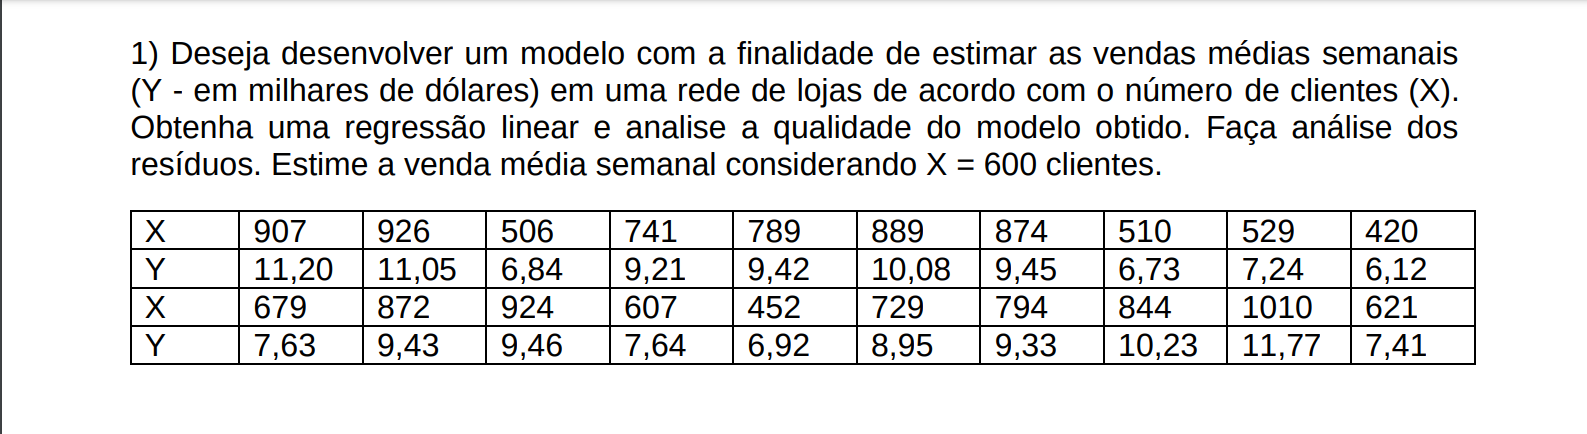

In [4]:
X = np.array([907, 926, 506, 741, 789, 889, 874, 510, 529, 420, 679, 872, 924, 607, 452, 729, 794, 844, 1010, 621])
Y = np.array([11.20, 11.05, 6.84, 9.21, 9.42, 10.08, 9.45, 6.73, 7.24, 6.12, 7.63, 9.43, 9.46, 7.64, 6.92, 8.95, 9.33, 10.23, 11.77, 7.41])

X = pd.DataFrame(X, columns=['X'])
X = sm.add_constant(X)

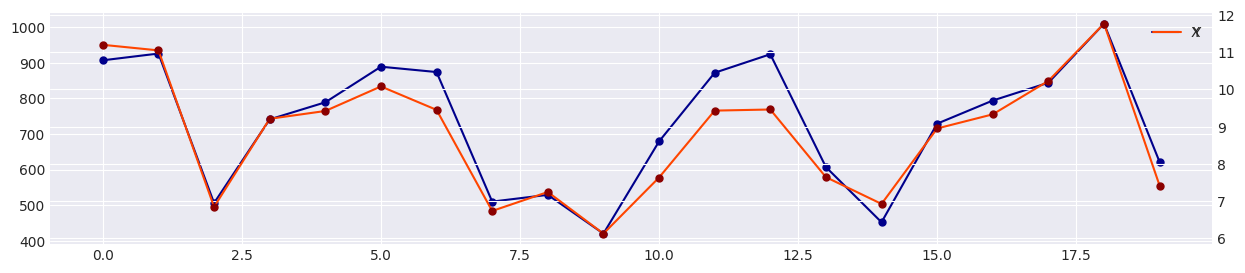

In [5]:
fig, ax = plt.subplots(figsize=(15,3))
ax2 = ax.twinx()
ax.plot(X.X, label='X', c='darkblue')
ax2.plot(Y, label='Y', c='orangered')
ax.scatter(range(len(X)), X.X, s=25, c='darkblue', zorder=3)
ax2.scatter(range(len(Y)), Y, s=25, c='darkred', zorder=3)
ax.legend()
ax2.legend()
plt.show()

In [6]:
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     186.2
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           6.21e-11
Time:                        20:47:48   Log-Likelihood:                -13.522
No. Observations:                  20   AIC:                             31.04
Df Residuals:                      18   BIC:                             33.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4230      0.481      5.038      0.000       1.413       3.434
X              0.0087      0.001     13.646      0.000       0.007       0.010
==============================================================================
Omnibus:                        0.608   Durbin-Watson:                   1.013
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.622
Skew:                          -0.347   Prob(JB):                        0.733
Kurtosis:                       2.485   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/home/ferpapi/.cache/pypoetry/virtualenvs/mbausp-h6Bsrd_o-py3.10/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


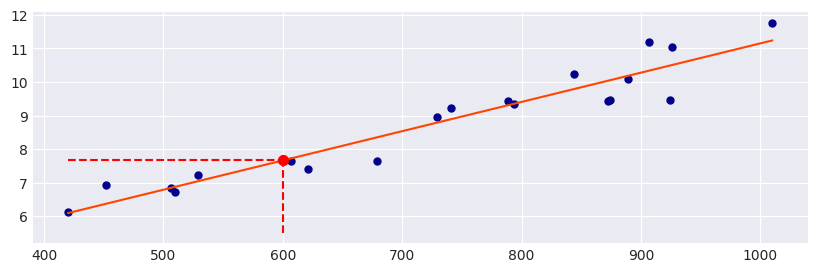


X=600, Y_hat = [7.660647]


In [7]:
fig, ax = plt.subplots(figsize=(10,3))
ax.scatter(X.X, Y, s=25, c='darkblue', zorder=3)

y_p = 600
y_h = model.predict((1,y_p))

min_x = X[X.X==min(X.X)]
max_x = X[X.X==max(X.X)]

min_y_hat = model.predict(min_x).values
max_y_hat = model.predict(max_x).values

_ = ax.plot([min_x.X, max_x.X], [min_y_hat, max_y_hat], c='orangered', zorder=3)
_ = ax.scatter(y_p, y_h, s=50, c='red', zorder=3)
_ = ax.plot([y_p, y_p], [0.9*min(Y), y_h], 'r--', zorder=3)
_ = ax.plot([min_x.X.values, y_p], [y_h, y_h], 'r--', zorder=3)
plt.show()
print('\nX=600, Y_hat =', y_h)

Para 600 clientes, a média semanal é estimada em 7.66 milhares de dólares

mean -9.325873406851315e-16
std 0.4757601340848472

Shapiro-Wilk test dos residuais -> pvalue: 0.7665435671806335.
Falha-se em rejeitar a hipótese nula, ou seja, os residuais são normalmente distribuídos



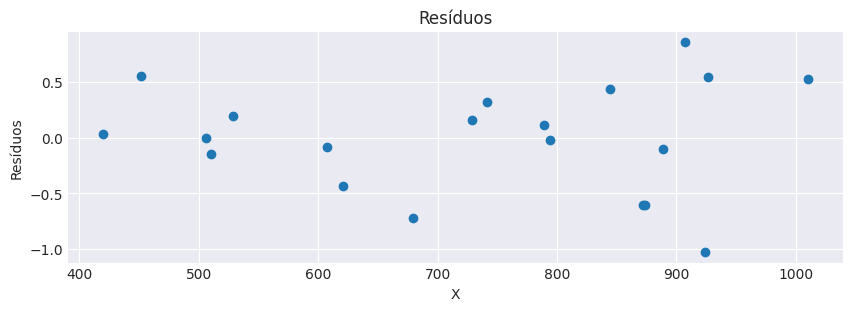

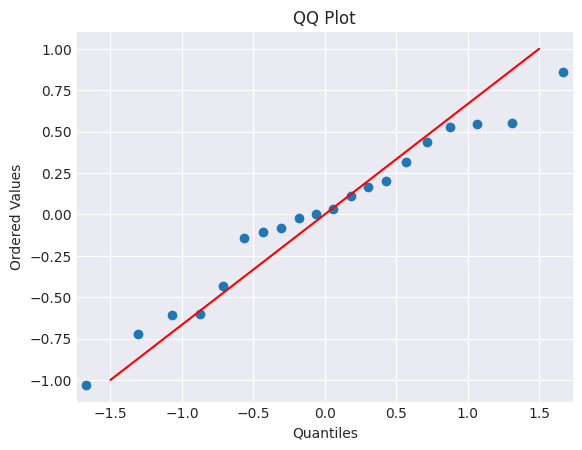

In [8]:
print('mean', np.mean(model.wresid))
print('std', np.std(model.wresid))
fig, axs = plt.subplots(1,1, figsize=(10,3))
plt.xlabel("X"); 
plt.ylabel("Resíduos"); 
plt.title("Resíduos")

axs.scatter(X.X, model.wresid)
sm.qqplot(model.wresid)
plt.plot([-1.5, 1.5], [-1,1],'r')
plt.xlabel("Quantiles"); 
plt.ylabel("Ordered Values"); 
plt.title("QQ Plot")
pvalue = scipy.stats.shapiro(model.wresid).pvalue
print()
print(f'Shapiro-Wilk test dos residuais -> pvalue: {pvalue}.\nFalha-se em rejeitar a hipótese nula, ou seja, os residuais são normalmente distribuídos')
print()

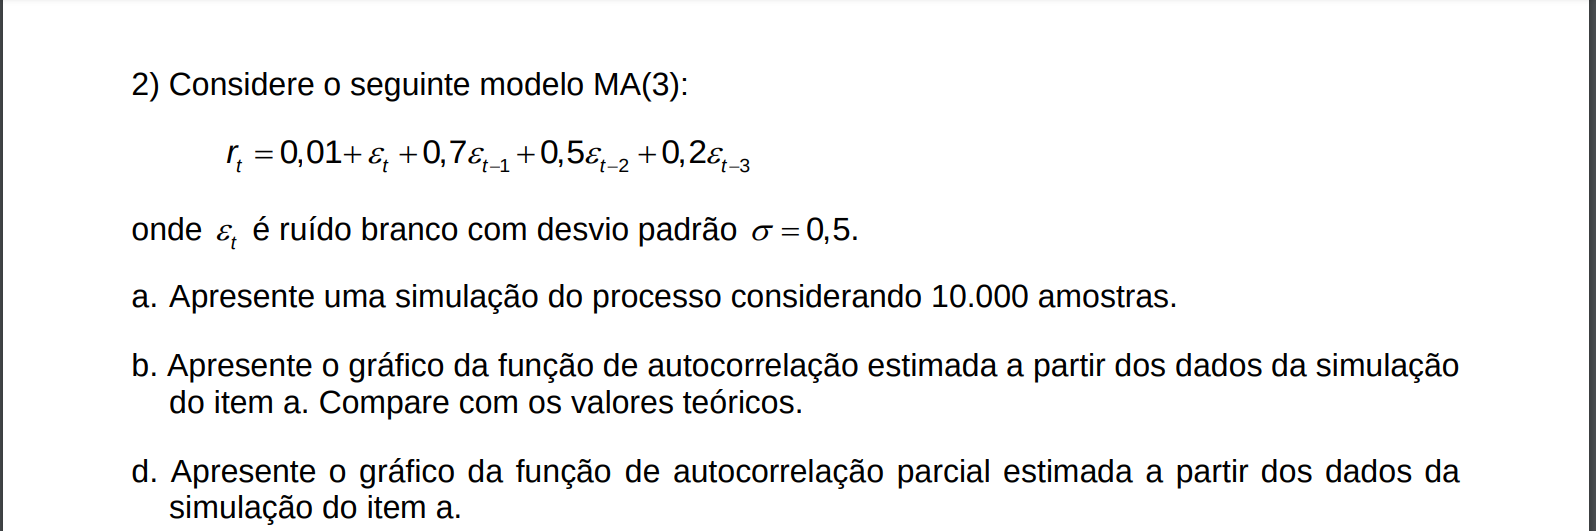

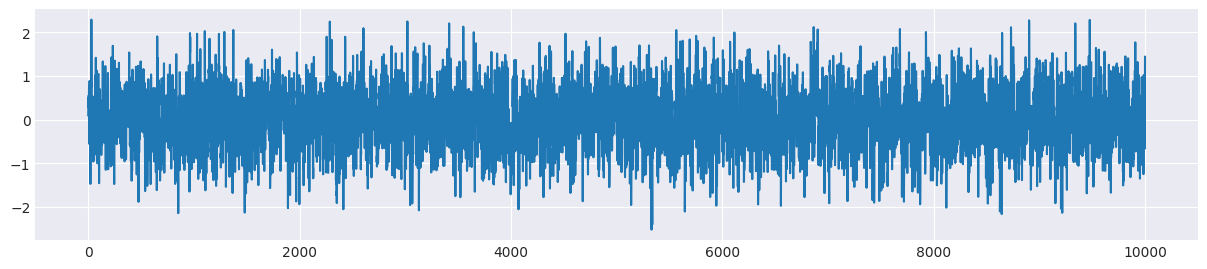

In [9]:
# define a distribuição
gen = scipy.stats.norm(0, 0.5)
# gera 10_000 amostras
y = gen.rvs(10_000)
# define a série temporal
y = [0.01 + y_t + 0.7*y[t-1] + 0.5*y[t-2] + 0.2*y[t-3] if t>=3 else y_t for t, y_t in enumerate(y)]
# plot
fig, ax = plt.subplots(figsize=(15,3))
p = ax.plot(y)


autocorrelations [1.000000e+00 6.504379e-01 3.585102e-01 1.139891e-01 6.414890e-04
 2.016969e-03]


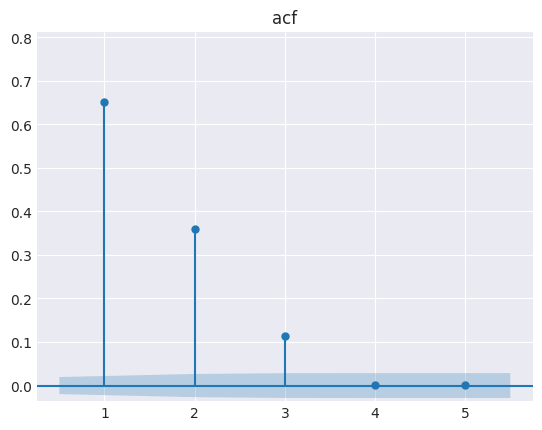

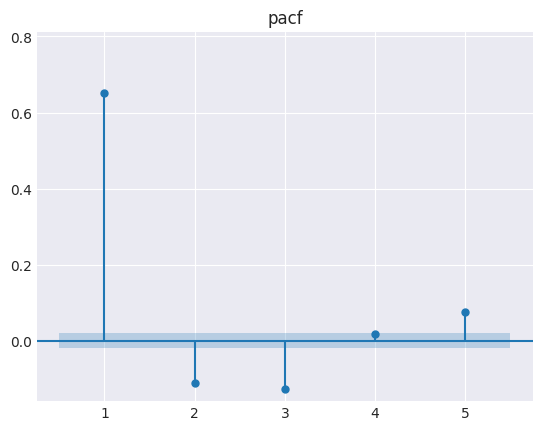

In [10]:
lags = 5

autocorrelations = acf(y, nlags=5)
print('autocorrelations', autocorrelations)

plot_acf(y, alpha=0.05, lags=lags, zero=False, auto_ylims=True, title=f'acf')
plot_pacf(y, alpha=0.05, lags=lags, zero=False, auto_ylims=True, title=f'pacf')
plt.show()

In [11]:
th = np.array([0.7, 0.5, 0.2]) #MA
gamma = np.zeros(4)
gamma[0] = (1+sum(th**2)) #gamma[0] normalizada
n = len(th) + 1
for i in range(1,4):
    gamma[i] = th[i-1] + sum(th[(i):n-1]*th[0:(n-1-i)]) #gamma[i] normalizadas
ACF_teo = gamma[1:n] / gamma[0]
print(f"ACF_TEO = {ACF_teo}")
print(f"ACF_SIM = {autocorrelations[1:]}")

ACF_TEO = [0.646067 0.359551 0.11236 ]
ACF_SIM = [6.504379e-01 3.585102e-01 1.139891e-01 6.414890e-04 2.016969e-03]


Como podemos ver, a autocorrelação descresce com o número de lags e os valores teóricos estão muito próximos dos simulados

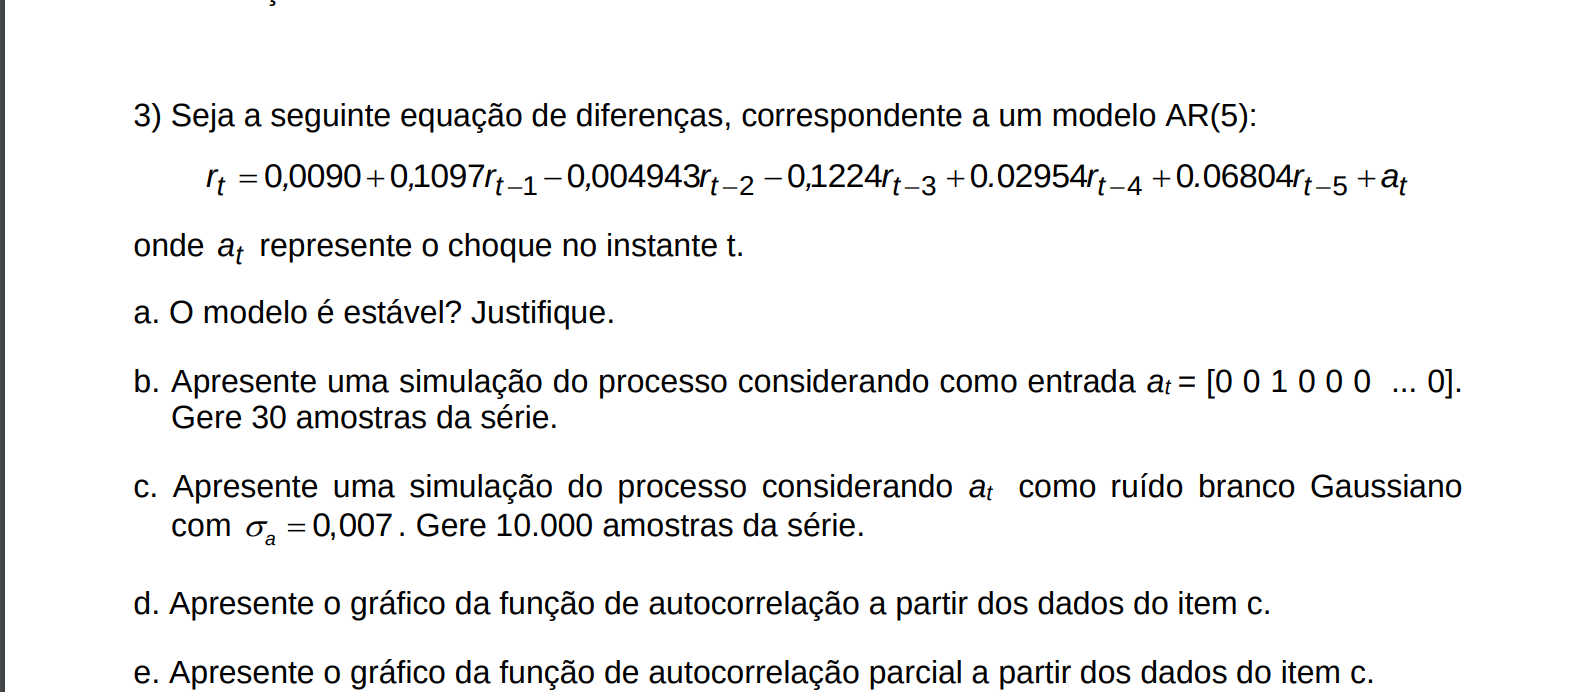

In [12]:
c = 0.0090 
p1 = 0.1097
p2 = -0.004943 
p3 = -0.1224
p4 = 0.02954
p5 = 0.06804

p = [p1, p2, p3, p4, p5]

In [13]:
z_poly = np.polynomial.polynomial.Polynomial((1, -p1, -p2, -p3, -p4, -p5))
z_poly

Polynomial([ 1.      , -0.1097  ,  0.004943,  0.1224  , -0.02954 , -0.06804 ], domain=[-1,  1], window=[-1,  1])

In [14]:
for r in z_poly.roots():
    print(r, '->', np.abs(r))

(-1.6676292579602663-0.8842381427836801j) -> 1.8875551475807641
(-1.6676292579602663+0.8842381427836801j) -> 1.8875551475807641
(0.5608253158304926-1.4155110154081532j) -> 1.522562468215407
(0.5608253158304926+1.4155110154081532j) -> 1.522562468215407
(1.7794515056587255+0j) -> 1.7794515056587255


O modelo é estável por apresentar todas as raízes do polinômio característico fora do círculo unitário (módulo > 1)

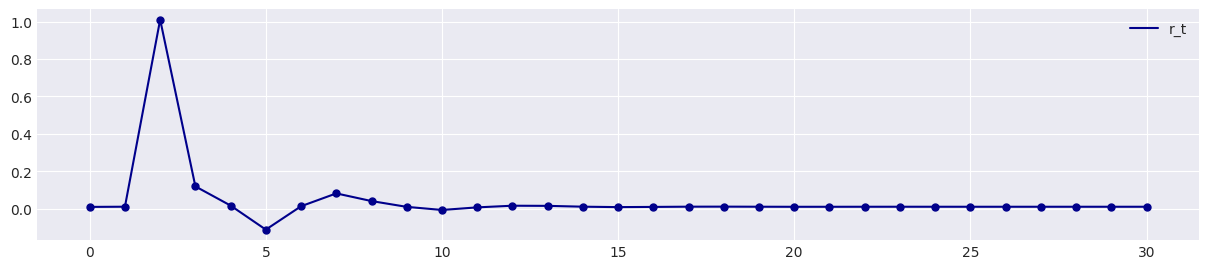

In [15]:
a_t = np.array([0,0,1] + [0,]*28) 
r_t = []

for i, a in enumerate(a_t):
    if i <= 5:
        r_lag = np.array(r_t[:i+1])
        p_lag = np.array(p[:i])[::-1]
        r_i = c + a + np.sum(p_lag*r_lag)
        r_t.append(r_i)
        continue

    r_lag = np.array(r_t[i-5:i])
    p_lag = p[::-1]
    r_i = c + a + np.sum(p_lag*r_lag)
    r_t.append(r_i)

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(r_t, label='r_t', c='darkblue')
ax.scatter(range(len(r_t)), r_t, s=25, c='darkblue', zorder=3)
ax.legend()
plt.show()

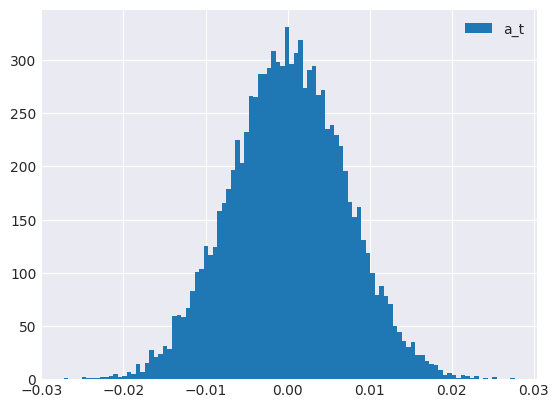

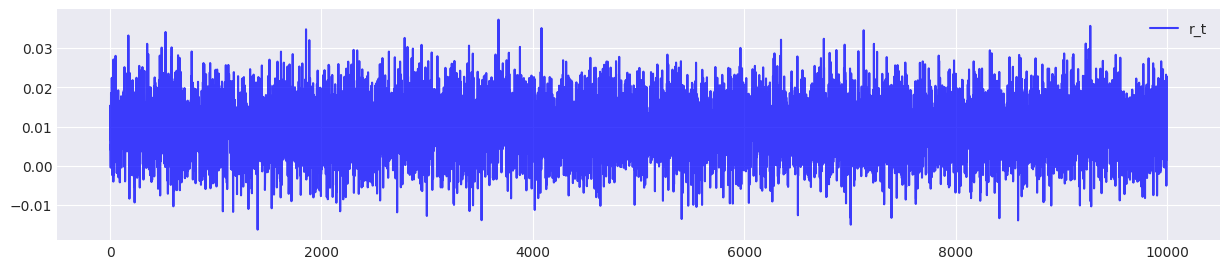

autocorrelations [ 1.        0.113863 -0.014187 -0.128717  0.003798  0.059605  0.036159
  0.003825 -0.010734 -0.006345  0.005871]


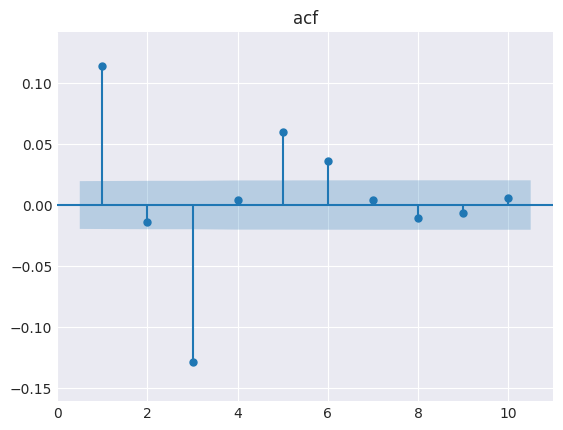

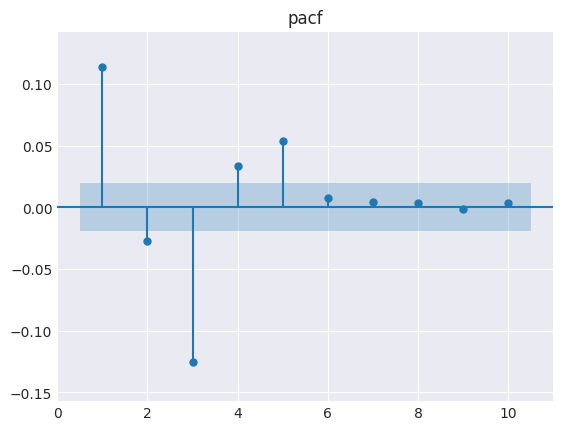

In [16]:
gen = scipy.stats.norm(0, 0.007)
a_t = gen.rvs(10_000)
r_t = []

for i, a in enumerate(a_t):
    if i <= 5:
        r_lag = np.array(r_t[:i+1])
        p_lag = np.array(p[:i])[::-1]
        r_i = c + a + np.sum(p_lag*r_lag)
        r_t.append(r_i)
        continue

    r_lag = np.array(r_t[i-5:i])
    p_lag = p[::-1]
    r_i = c + a + np.sum(p_lag * r_lag)
    r_t.append(r_i)

plt.hist(a_t, bins=100, label='a_t')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(r_t, label='r_t', c='blue', alpha=0.75)

ax.legend()
plt.show()

lags = 10

autocorrelations = acf(r_t, nlags=lags)
print('autocorrelations', autocorrelations)

plot_acf(r_t, alpha=0.05, lags=lags, zero=False, auto_ylims=True, title=f'acf')
plot_pacf(r_t, alpha=0.05, lags=lags, zero=False, auto_ylims=True, title=f'pacf')
plt.show()

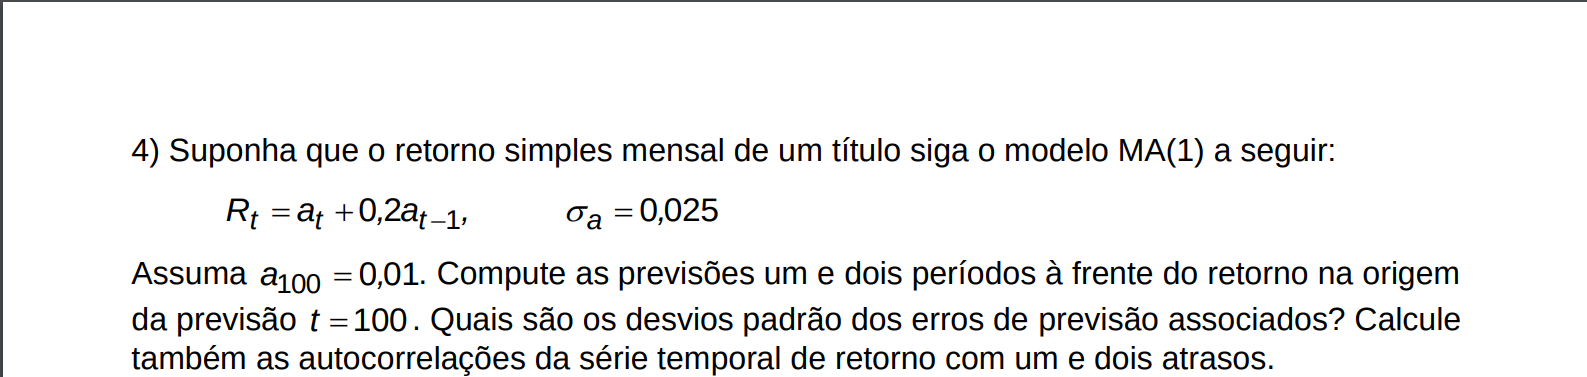

O modelo MA(1) é dado por
$$
R_{t} = \mu + a_t + \theta a_{t-1}
$$

então para esse modelo, $\mu=0$ e $\theta=0.2$

então
$$
\hat{R}_{t+1|t} = \mathbf{E}(R_{t+1} | \mathbf{X_t}) = \mu + \theta a_t
$$

ou seja
$$
\hat{R}_{t+1|t} = 0.2*a_t
$$

$$
\hat{R}_{101} = 0.2*a_{100} = 0.2*0.01 = 0.002
$$

$$
\hat{R}_{102} = \mu = 0
$$

$$
e_{t+1} = R_{t+1} - \hat{R}_{t+1} = \mu + a_{t+1} + \theta a_{t} - \mu - \theta a_t = a_{t+1}
$$ 

$$
\implies \mathbf{E}(e) = 0; Var(e) = \sigma^2
$$

Então o desvio padrão do erro para um período é 

$$
\sigma_{e1} = \sigma_a = 0.025
$$

Para 2 períodos, o desvio padrão do erro é:
$$
\sigma_{e2} = \sqrt{(1+\theta^2)\sigma^2} = 0.0255
$$

A autocorrelação para 1 e 2 atrasos são

$$
\rho_1 = \frac{\theta}{1+\theta^2} = 0.1923
$$
$$
\rho_2 = 0
$$


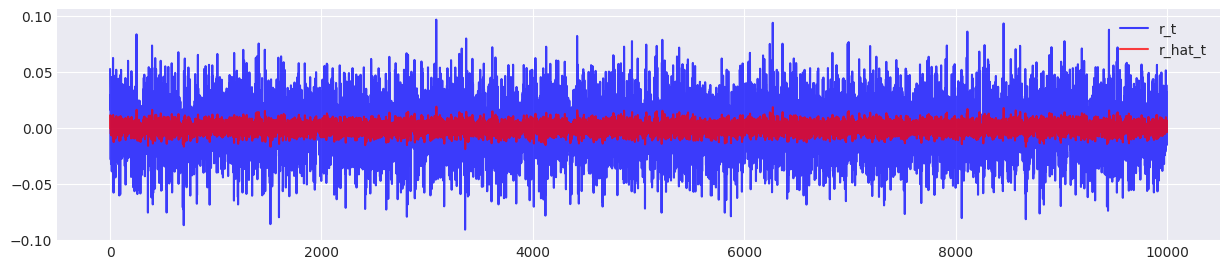

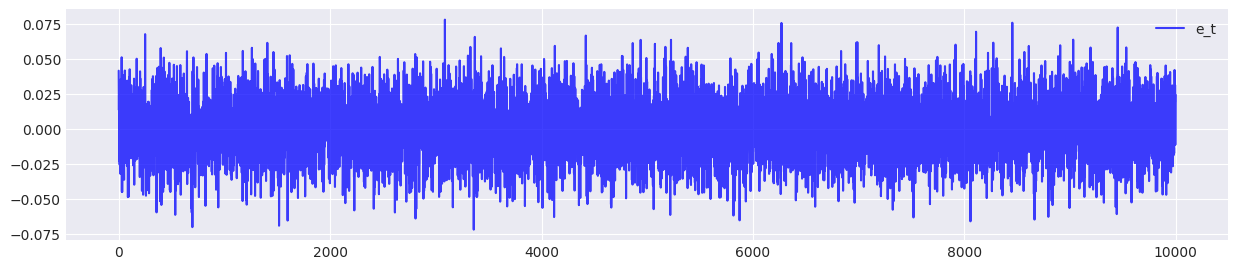

Mean r_t: 0.00012053455245166728, std error 0.020696661198629427

Autocorrelations: [ 1.        0.189099 -0.013161  0.003888  0.009659 -0.009896]


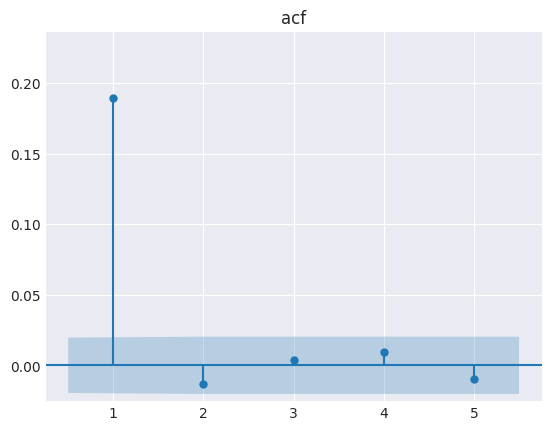

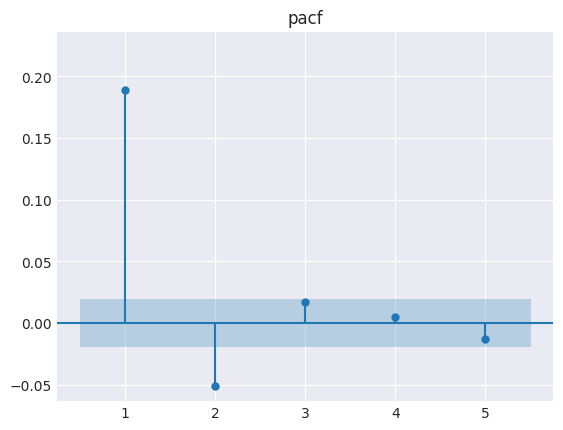

In [17]:
gen = scipy.stats.norm(0, 0.025)
a_t = gen.rvs(10_000)
r_t = []
r_hat_t = [0]


for i, a in enumerate(a_t):
    if i == 0:
        continue
    r_t.append(a + a_t[i-1]*0.2)
    r_hat_t.append(0.2*a)

r_t = np.array(r_t)
r_hat_t = np.array(r_hat_t)
e_t = r_t - r_hat_t[1:]

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(r_t, label='r_t', c='blue', alpha=0.75)
ax.plot(r_hat_t, label='r_hat_t', c='red', alpha=0.75)
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(e_t, label='e_t', c='blue', alpha=0.75)
ax.legend()
plt.show()

print(f'Mean r_t: {np.mean(e_t)}, std error {np.std(e_t)}')
print()

lags = 5

autocorrelations = acf(r_t, nlags=lags)
print(f'Autocorrelations: {autocorrelations}')

plot_acf(r_t, alpha=0.05, lags=lags, zero=False, auto_ylims=True, title=f'acf')
plot_pacf(r_t, alpha=0.05, lags=lags, zero=False, auto_ylims=True, title=f'pacf')
plt.show()

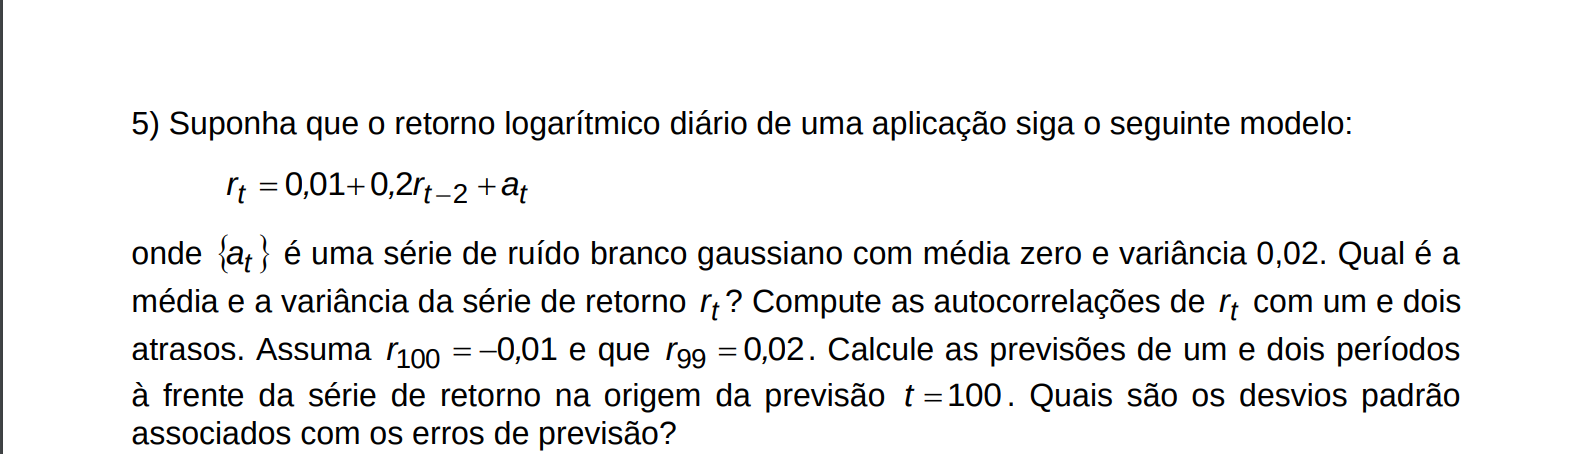

In [18]:
phi1 = 0
phi2 = 0.2
sigma = np.sqrt(0.02)

var = (1-phi2)*sigma**2/((1+phi2)*(1-phi2)**2-phi1**2)
print('variance', var)

variance 0.02083333333333333


O modelo AR(2) é dado por

$$
R_{t} = c + \phi_1R_{t-1} + \phi_2R_{t-2} + a_t
$$

então para esse modelo, $c=0.01$, $\phi_1=0$ e $\phi_2=0.2$ 

$$
(1-\phi_1L - \phi_2L^2)R_{t} = \mu + a_t
$$

As raízes do polinômio $(1-\phi_1z - \phi_2z^2 = 0)$ são $(-2.236, 2.236)$, então a média é

$$
\mu = \frac{c}{1-\phi_1-\phi_2} = 0.0125
$$

e a variância é:

$$
\gamma_0 = \frac{(1-\phi_2)*\sigma^2}{(1+\phi_2)*[(1-\phi_2)^2-\phi_1^2]} = 0.02083
$$

A previsão para um período é

$$
\hat{R}_{t+1|t} = c + \phi_1*R_{t} \phi_2*R_{t-1}
$$

$$
\hat{R}_{101} = 0.01 + 0.2*R_{99} = 0.01 + 0.2*-0.01 = 0.014
$$

A previsão para dois períodos é

$$
\hat{R}_{t+2|t} = c + \phi_1*R_{t+1} + \phi_2*R_{t}
$$

$$
\hat{R}_{102} = 0.01 + 0.2*R_{100} = 0.01 + 0.2*0.02 = 0.008
$$
Lembrando que $\sigma = \sqrt{0.02}$

Para 1 período, o erro da previsão tem média 0 e desvio padrão $\sigma_e=\sigma=0.1414$

Para 2 períodos, o erro da previsão tem média 0 e desvio padrão $\sigma_e=\sqrt{(1+\phi_1^2)*\sigma^2}= \sigma = 0.1414$

A autocorrelação para 1 e 2 atrasos são

$$
\rho_1 = \frac{\phi_1}{1-\phi_2} = 0
$$
$$
\rho_2 = \phi_1\rho1 + \phi_2 = \phi_2 = 0.2
$$


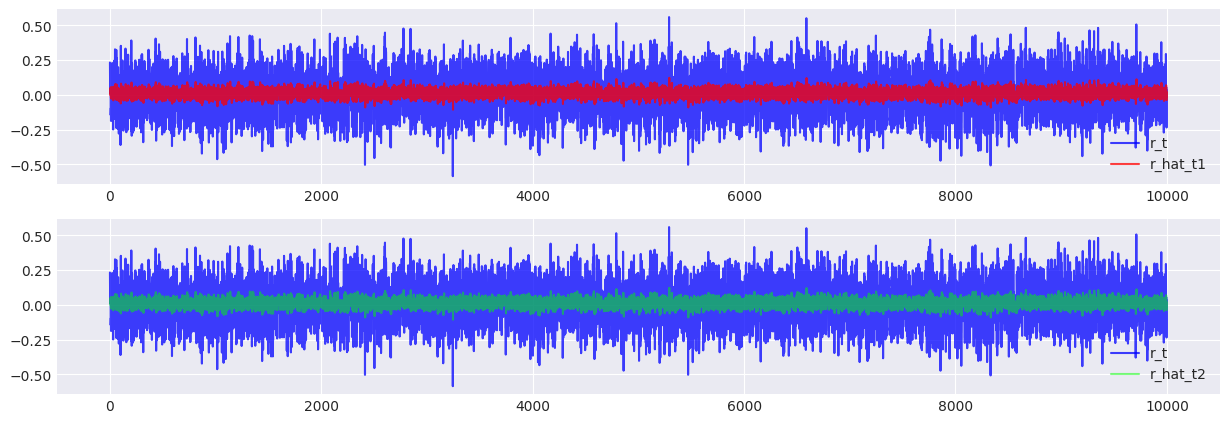

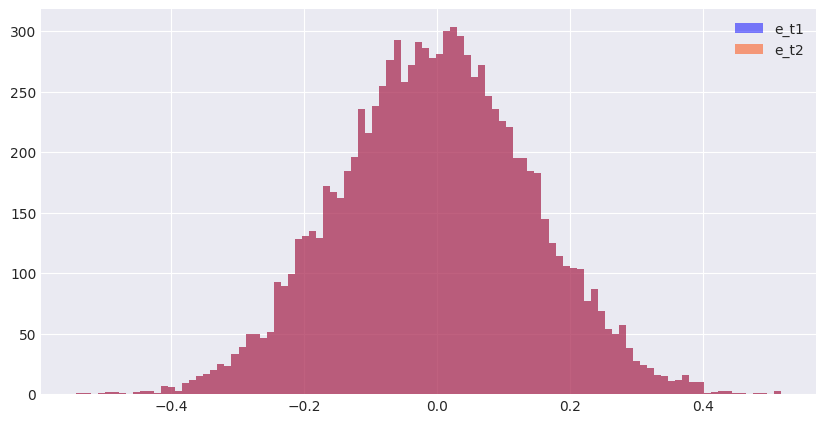

Mean r_t: 0.009198009379962924, var r_t 0.021481744775404085
Mean e_t1: -0.002690735866578211, std e_t1 0.1437278019333978
Mean e_t2: -0.002690735866578211, std e_t2 0.1437278019333978

Autocorrelations: [ 1.       -0.010987  0.196199 -0.001389  0.016155  0.011962]


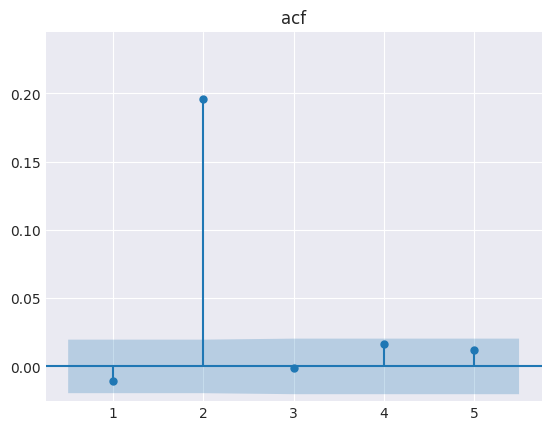

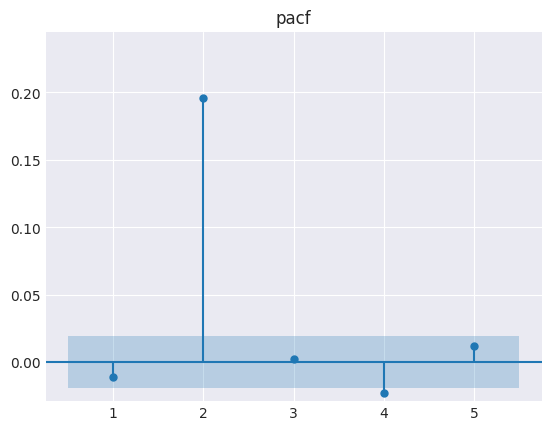

In [19]:
gen = scipy.stats.norm(0, np.sqrt(0.02))
a_t = gen.rvs(10_000)
r_t = []
r_hat_t1 = []
r_hat_t2 = []



for i, a in enumerate(a_t):
    if i < 2:
        r_t.append(0.01 + a)
        r_hat_t1.append(0)
        r_hat_t2.append(0)
        continue

    r = 0.01 + a + 0.2*a_t[i-2]
    r_t.append(r)
    r_hat_t1.append(0.01 + 0.2*r_t[i-1])
    r_hat_t2.append(0.01 + 0.2*r)
    

r_t = np.array(r_t)
r_hat_t1 = np.array(r_hat_t1)
r_hat_t2 = np.array(r_hat_t2)

r_hat_t1 = shift(r_hat_t1, 1, cval=np.NaN)
r_hat_t2 = shift(r_hat_t2, 2, cval=np.NaN)

e_t1 = r_t[5:] - r_hat_t1[5:]
e_t2 = r_t[5:] - r_hat_t2[5:]

fig, axs = plt.subplots(2, 1, figsize=(15,5))
axs[0].plot(r_t, label='r_t', c='blue', alpha=0.75)
axs[0].plot(r_hat_t1, label='r_hat_t1', c='red', alpha=0.75)
axs[1].plot(r_t, label='r_t', c='blue', alpha=0.75)
axs[1].plot(r_hat_t2, label='r_hat_t2', c='lime', alpha=0.5)

axs[0].legend()
axs[1].legend()
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
plt.hist(e_t1, bins=100, color='b', alpha=0.5, label='e_t1')
plt.hist(e_t2, bins=100, color='orangered', alpha=0.5, label='e_t2')
ax.legend()
plt.show()

print(f'Mean r_t: {np.mean(r_t)}, var r_t {np.var(r_t)}')
print(f'Mean e_t1: {np.mean(e_t1)}, std e_t1 {np.std(e_t1)}')
print(f'Mean e_t2: {np.mean(e_t2)}, std e_t2 {np.std(e_t2)}')

print()

lags = 5

autocorrelations = acf(r_t, nlags=lags)
print(f'Autocorrelations: {autocorrelations}')

plot_acf(r_t, alpha=0.05, lags=lags, zero=False, auto_ylims=True, title=f'acf')
plot_pacf(r_t, alpha=0.05, lags=lags, zero=False, auto_ylims=True, title=f'pacf')
plt.show()

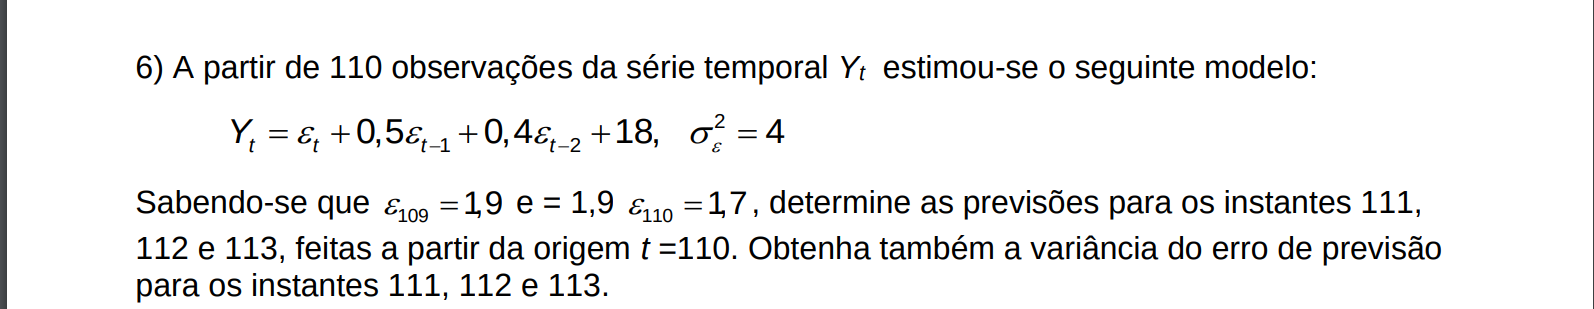

O modelo MA(2) é dado por
$$
Y_{t} = \mu + a_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2}
$$

então para esse modelo, $\mu=18$, $\theta_1=0.5$ e $\theta_2=0.4$

As previsões são dadas por:
$$
\hat{Y}_{t+1|t} = \mu + \theta_1\epsilon_t + \theta_2\epsilon_{t-1}
$$

$$
\hat{Y}_{t+2|t} = \mu + \theta_2\epsilon_{t}
$$

$$
\hat{Y}_{t+3|t} = \mu
$$

ou seja

$$
\hat{Y}_{111} = 18 + 0.5*\epsilon_{110} + 0.4*\epsilon_{109} = 19.61
$$

$$
\hat{Y}_{112} = 18 + 0.4*\epsilon_{110} = 18.68
$$

$$
\hat{Y}_{113} = 18
$$

A variância do processo é 
$$
Var(Y_t) = \sigma^2(1+\theta_1^2+\theta_2^2) = 4*(1+0.5^2+0.4^2) = 5.64
$$
e a variância dos erros das predições é

$$
\sigma_1^2 = \sigma^2 = 4
$$
$$
\sigma_2^2 = \sigma^2 * (1+\theta_1^2) = 4 + 4*(0.5^2) = 5
$$
$$
\sigma_3^2 = \sigma^2 * (1+\theta_1^2+\theta_2^2) = 5.64
$$